In [103]:
import numpy as np
from qiskit import (QuantumCircuit, execute, Aer)
from qiskit.visualization import plot_histogram

In [104]:
sim = Aer.get_backend('qasm_simulator')
circ = QuantumCircuit(2, 2)

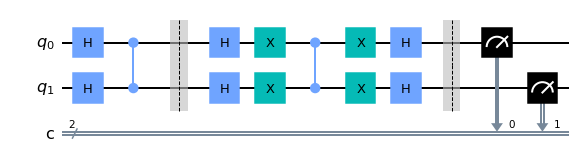

In [105]:
circ.h(0)
circ.h(1)

# 01
#circ.cz(0,1)
#circ.z(1) 

# 10
#circ.cz(0,1)
#circ.z(0)

# 11
circ.cz(0,1)

# 00
#circ.x(0)
#circ.x(1)
#circ.cz(0,1) # cz
#circ.x(0)
#circ.x(1)

circ.barrier()

circ.h(0)
circ.h(1)

circ.x(0)
circ.x(1)

circ.cz(0,1)

circ.x(0)
circ.x(1)

circ.h(0)
circ.h(1)

circ.barrier()

# circ.measure_all()
circ.measure(range(2),range(2))
circ.draw('mpl')

{'11': 1024}


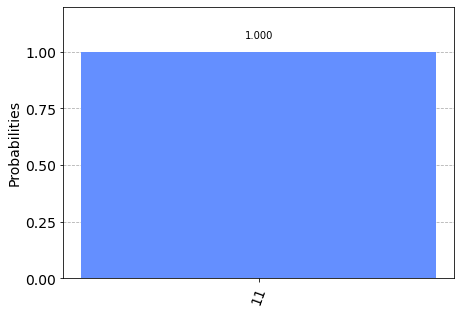

In [106]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)